Source of data can be obtained [here](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series) - provided by John Hopkins University.

### Unfortunately, JHU didn't start to track confirmed cases as a function of time until March 10, 2020

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv(f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [3]:
df = df.fillna({'Province/State': ''})

In [4]:
df_us = df[(df['Country/Region'] == 'US') & (~df['Province/State'].str.contains(','))]

In [5]:
df_us

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,442,568,572,643,904,1076,1014,1376,1524,1793
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,328,421,525,732,967,1706,2495,5365,8310,11710
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,221,282,340,426,557,698,751,952,1177,1364
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,108,123,138,164,197,218,218,328,413,525
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,46,46,46,46,47,47,47,47,49,49
103,Grand Princess,US,37.6489,-122.6655,0,0,0,0,0,0,...,21,21,21,21,20,21,21,22,23,23
104,Georgia,US,33.0406,-83.6431,0,0,0,0,0,0,...,31,42,66,99,121,146,199,287,420,507
105,Colorado,US,39.0598,-105.3111,0,0,0,0,0,0,...,45,49,101,131,160,160,184,277,363,390
106,Florida,US,27.7663,-81.6868,0,0,0,0,0,0,...,35,50,76,115,155,216,314,417,563,659
107,New Jersey,US,40.2989,-74.5210,0,0,0,0,0,0,...,29,29,69,98,178,267,267,742,890,1327


In [6]:
df = df_us.drop(columns=['Country/Region', 'Lat', 'Long'])

In [7]:
df_final = df.transpose()
df_final = df_final.rename(columns=df_final.iloc[0]).drop(df_final.index[0])

In [8]:
df_final.tail()

,Washington,New York,California,Massachusetts,Diamond Princess,Grand Princess,Georgia,Colorado,Florida,New Jersey,...,Montana,New Mexico,North Dakota,South Dakota,West Virginia,Wyoming,Alabama,Puerto Rico,Guam,Virgin Islands
3/17/20,1076,1706,698,218,47,21,146,160,216,267,...,9,23,3,11,1,11,39,5,3,2
3/18/20,1014,2495,751,218,47,21,199,184,314,267,...,11,23,6,11,1,15,46,5,5,2
3/19/20,1376,5365,952,328,47,22,287,277,417,742,...,11,35,18,11,2,18,78,5,12,3
3/20/20,1524,8310,1177,413,49,23,420,363,563,890,...,15,43,19,14,7,19,83,14,14,3
3/21/20,1793,11710,1364,525,49,23,507,390,659,1327,...,21,43,28,14,8,23,131,21,15,3


In [9]:
df_final = df_final.drop(columns=['Diamond Princess', 'Grand Princess'])

In [10]:
df_final.iloc[:, range(10)].tail()

,Washington,New York,California,Massachusetts,Georgia,Colorado,Florida,New Jersey,Oregon,Texas
3/17/20,1076,1706,698,218,146,160,216,267,66,110
3/18/20,1014,2495,751,218,199,184,314,267,68,173
3/19/20,1376,5365,952,328,287,277,417,742,88,260
3/20/20,1524,8310,1177,413,420,363,563,890,114,394
3/21/20,1793,11710,1364,525,507,390,659,1327,114,581


#### Convert dataframe index into datetime data type for easier filtering

In [11]:
df_final.index = [datetime.strptime(date, '%m/%d/%y') for date in df_final.index]

#### We can see that JHU did not start tracking incidents until March 10, 2020

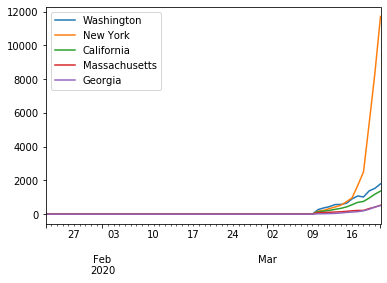

In [12]:
df_final.iloc[:, range(5)].plot();

#### So we will start our chart with March 10, 2020

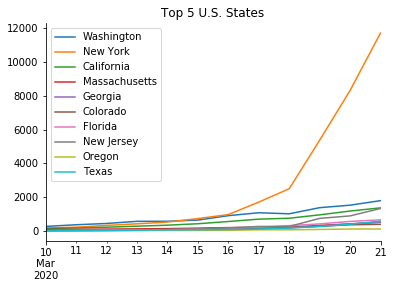

In [17]:
# Chart Top 5 U.S. states
df_final['2020-03-10':].iloc[:, range(10)].plot();
plt.title("Top 5 U.S. States")
sns.despine()

#### Ohio's counts

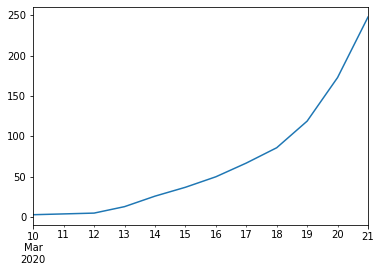

In [14]:
df_final['2020-03-10':].loc[:, 'Ohio'].plot();

In [15]:
df_final['2020-03-10':].loc[:, 'Ohio']

2020-03-10      3
2020-03-11      4
2020-03-12      5
2020-03-13     13
2020-03-14     26
2020-03-15     37
2020-03-16     50
2020-03-17     67
2020-03-18     86
2020-03-19    119
2020-03-20    173
2020-03-21    248
Name: Ohio, dtype: object

In [16]:
df_final['2020-03-10':].loc[:, 'New York']

2020-03-10      173
2020-03-11      220
2020-03-12      328
2020-03-13      421
2020-03-14      525
2020-03-15      732
2020-03-16      967
2020-03-17     1706
2020-03-18     2495
2020-03-19     5365
2020-03-20     8310
2020-03-21    11710
Name: New York, dtype: object